In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Jacobi

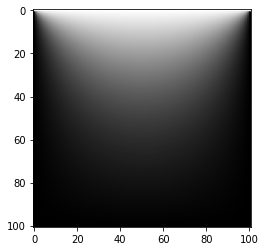

In [224]:
# Constantes
M = 100   # numero de quadrados numa linha da grelha
V = 1     # Voltagem na parede de cima
target = 1e-6 # Precisão desejada

# Criar arrays para os valores do potencial
phi = np.zeros([M + 1, M + 1],float)
phi[0,:] = V          # Põe a linha do topo com potencial V
phiprime = np.empty([M + 1, M + 1],float)

# Ciclo Principal
delta = 1
while delta>target:
    
    # Calculo novos valores do potencial
    for i in range(M + 1):
        for j in range(M + 1):
            if i == 0 or i == M or j == 0 or j == M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
    # Calculo a maxima diferença entre o phi e o phiprime
    delta = np.max(abs(phi-phiprime))
    
    phi, phiprime = phiprime, phi
    
plt.imshow(phi)
plt.gray()
plt.show()

## Gauss-Seidel Overrelaxation

101


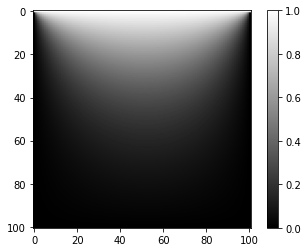

1.69 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [215]:
%%timeit -r 1 -n 1
M = 100     
target = 1e-6 
w = 0.90

phi = np.zeros([M + 1, M + 1],float)
phi[0,:] = 1        
  
delta = 1
k= 0 
while np.max(delta) > target or k<2:
    V = phi.copy()
    for i in range(M+1):
        for j in range(M+1):
            if i == 0 or i == M or j == 0 or j == M:
                phi[i,j] = phi[i,j]
            else:
                phi[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) * (1+w)/4 - w * phi[i,j]
    k += 1
    delta = V-phi
print(k)
plt.imshow(phi)
plt.gray()
plt.colorbar()
plt.show()

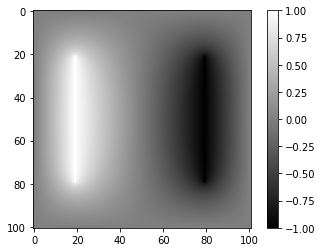

4.05 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [227]:
%%timeit -r 1 -n 1
M = 100   
target = 1e-6
w = 0.90

phi = np.zeros([M + 1, M + 1],float)


delta = 1
while np.max(delta) > target:
    V = phi.copy()
    for i in range(M+1):
        for j in range(M+1):
            if i == 0 or i == M or j == 0 or j == M:
                phi[i,j] = phi[i,j]
            elif i == 19 and 20<j<80:
                phi[i,j]= 1
            elif i == 79 and 20<j<80:
                phi[i,j]= -1
            else:
                phi[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) * (1+w)/4 - w * phi[i,j]

    delta = V-phi

plt.imshow(phi.T)
plt.gray()
plt.colorbar()
plt.show()